# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Frameworks</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## Classificação de Imagens com GluonCV e Modelo Pré-Treinado

Nosso objetivo nesta tarefa é implementar um detector de bolas de tênis usando uma rede de classificação de imagens pré-treinada do GluonCV. 

Vamos avançar no pipeline, desde o carregamento e a transformação de uma imagem de entrada até o carregamento e o uso de um modelo pré-treinado. Como estamos interessados apenas em detectar bolas de tênis, esse é um problema de classificação binária.

GluonCV: https://gluon-cv.mxnet.io/

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Instala o MxNet
!pip install -q mxnet gluoncv

In [4]:
# Imports
import os
import numpy as np
import mxnet as mx
import gluoncv as gcv
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from mxnet.gluon.data.vision import transforms

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

mxnet      1.6.0
gluoncv    0.7.0
numpy      1.18.2
matplotlib 3.2.1
Data Science Academy


In [6]:
# Define o diretório de imagens
M3_DATA = Path(os.getenv('DATA_DIR', 'dados'))
M3_IMAGES = Path(M3_DATA, 'imagens')
M3_MODELS = Path(M3_DATA, 'modelos')

In [7]:
# Função para carregar uma imagem
def carrega_imagem(filepath):
    return mx.image.imread(filepath)
    raise NotImplementedError()

In [8]:
# Define o caminho de uma imagem
arquivo_imagem = Path(M3_IMAGES, 'imagem1.jpg')

In [9]:
# Carrega uma imagem
imagem_teste = carrega_imagem(arquivo_imagem)

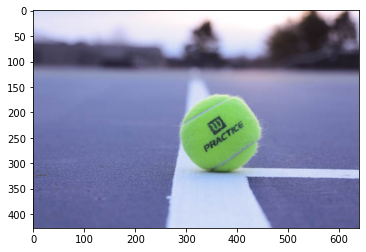

In [10]:
# Mostra a imagem carregada
plt.imshow(imagem_teste.asnumpy())

In [11]:
# Função para transformar uma imagem
def transforma_imagem(array):
    imagem_transformada = transforms.Compose([transforms.Resize(224, keep_ratio = True),
                                              transforms.CenterCrop((224,224)),
                                              transforms.ToTensor(),
                                              transforms.Normalize([.485, .456, .606], [.229, .224, .225])])
    return (imagem_transformada(array).expand_dims(0))

In [12]:
# Transforma a imagem
saida_imagem_transformada = transforma_imagem(imagem_teste)

In [13]:
# Função para carregar um modelo pré-treinado
def carrega_modelo_pre_treinado():
    return gcv.model_zoo.mobilenet1_0(root = M3_MODELS, pretrained = True)

In [14]:
# Carrega o modelo pré-treinado 
modelo = carrega_modelo_pre_treinado()

9624KB [00:00, 24267.62KB/s]                          


In [15]:
# Extrai os pesos do modelo pré-treinado
params = modelo.collect_params(select = modelo.name + '_conv0_weight')

In [16]:
# Função para prever as probabilidades
def preve_proba(modelo, data):
    direct_output = modelo(data)[0]
    return mx.nd.softmax(direct_output)

In [17]:
# Classe com o modelo completo
class ClassificadorBolaTenis():
    def __init__(self):
        self._network = carrega_modelo_pre_treinado()
        
    def classify(self, filepath):
        transformed_image = transforma_imagem(carrega_imagem(filepath))
        self._visualize(transformed_image)
        pred_proba = preve_proba(self._network, transformed_image)[852].asscalar()
        print('{0:.2%} de confiança que esta imagem é de uma bola de tênis.'.format(pred_proba))
        return pred_proba
    
    def _visualize(self, transformed_image):
        chw_image = transformed_image[0].transpose((1,2,0))
        chw_image = ((chw_image * 64) + 128).clip(0, 255).astype('uint8')
        plt.imshow(chw_image.asnumpy())

In [18]:
# Cria o classificador
modelo_clf = ClassificadorBolaTenis()

99.18% de confiança que esta imagem é de uma bola de tênis.


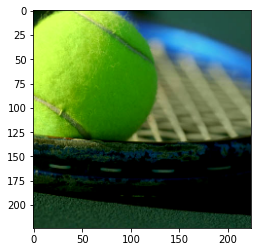

In [19]:
# Classifica uma imagem
imagem1 = Path(M3_IMAGES, 'imagem2.jpg')
pred_proba = modelo_clf.classify(imagem1)

99.66% de confiança que esta imagem é de uma bola de tênis.


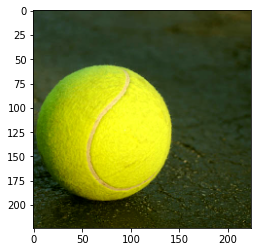

In [20]:
# Classifica uma imagem
imagem2 = Path(M3_IMAGES, 'imagem3.jpg')
pred_proba = modelo_clf.classify(imagem2)

0.01% de confiança que esta imagem é de uma bola de tênis.


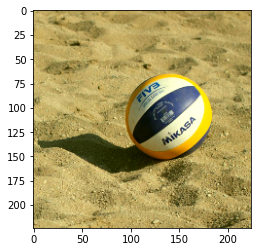

In [21]:
# Classifica uma imagem
imagem3 = Path(M3_IMAGES, 'imagem4.jpg')
pred_proba = modelo_clf.classify(imagem3)

# Fim